In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load the dataset
fp = "../data/ncr_ride_bookings.csv"
df = pd.read_csv(fp, low_memory=False)

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)


Dataset Shape: (150000, 21)

First 5 rows:
         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer C

In [3]:
# Identify column mappings based on the actual data structure
print("Column Analysis:")
print("="*50)

# Date and time columns
date_time_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['date', 'time'])]
print(f"Date/Time columns: {date_time_cols}")

# User/Customer columns
user_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['customer', 'user', 'rider'])]
print(f"User/Customer columns: {user_cols}")

# ID columns
id_cols = [col for col in df.columns if 'id' in col.lower()]
print(f"ID columns: {id_cols}")

# Status columns
status_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['status', 'state'])]
print(f"Status columns: {status_cols}")

# Monetary columns
money_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['value', 'fare', 'amount', 'price'])]
print(f"Monetary columns: {money_cols}")

# Distance columns
dist_cols = [col for col in df.columns if 'distance' in col.lower()]
print(f"Distance columns: {dist_cols}")

# Rating columns
rating_cols = [col for col in df.columns if 'rating' in col.lower()]
print(f"Rating columns: {rating_cols}")

# Vehicle/Type columns
vehicle_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['vehicle', 'type'])]
print(f"Vehicle/Type columns: {vehicle_cols}")


Column Analysis:
Date/Time columns: ['Date', 'Time']
User/Customer columns: ['Customer ID', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Customer Rating']
ID columns: ['Booking ID', 'Customer ID', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Incomplete Rides Reason', 'Ride Distance']
Status columns: ['Booking Status']
Monetary columns: ['Booking Value']
Distance columns: ['Ride Distance']
Rating columns: ['Driver Ratings', 'Customer Rating']
Vehicle/Type columns: ['Vehicle Type']


In [4]:
# Define column mappings based on the actual dataset
DATE_COL = "Date"
TIME_COL = "Time"
USER_COL = "Customer ID"
BOOKING_ID_COL = "Booking ID"
STATUS_COL = "Booking Status"
VEHICLE_COL = "Vehicle Type"
PICKUP_COL = "Pickup Location"
DROP_COL = "Drop Location"
FARE_COL = "Booking Value"
DIST_COL = "Ride Distance"
DRIVER_RATING_COL = "Driver Ratings"
CUSTOMER_RATING_COL = "Customer Rating"
PAYMENT_COL = "Payment Method"

print("Column Mappings:")
print(f"Date: {DATE_COL}")
print(f"Time: {TIME_COL}")
print(f"User: {USER_COL}")
print(f"Status: {STATUS_COL}")
print(f"Fare: {FARE_COL}")
print(f"Distance: {DIST_COL}")
print(f"Driver Rating: {DRIVER_RATING_COL}")
print(f"Customer Rating: {CUSTOMER_RATING_COL}")


Column Mappings:
Date: Date
Time: Time
User: Customer ID
Status: Booking Status
Fare: Booking Value
Distance: Ride Distance
Driver Rating: Driver Ratings
Customer Rating: Customer Rating


In [5]:
# Data preprocessing and cleaning
print("Data Quality Analysis:")
print("="*50)

# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Create datetime column
df['datetime'] = pd.to_datetime(df[DATE_COL] + ' ' + df[TIME_COL], errors='coerce')

# Basic statistics
print(f"\nDate range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total unique customers: {df[USER_COL].nunique()}")
print(f"Total unique bookings: {df[BOOKING_ID_COL].nunique()}")

# Clean customer ID (remove quotes)
df[USER_COL] = df[USER_COL].astype(str).str.replace('"', '').str.replace("'", "")
df[BOOKING_ID_COL] = df[BOOKING_ID_COL].astype(str).str.replace('"', '').str.replace("'", "")

print(f"\nAfter cleaning - Unique customers: {df[USER_COL].nunique()}")
print(f"After cleaning - Unique bookings: {df[BOOKING_ID_COL].nunique()}")


Data Quality Analysis:
Missing values per column:
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

Date range: 2024-01-01 00:19:34 to 2024-12-30 23:36:11
Total unique customers: 148788
Total unique bookings: 148767

After cleaning - Unique customers: 148788
After cleaning - Unique bookings: 148767


Booking Status Distribution:
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

Percentage distribution:
Booking Status
Completed                62.0
Cancelled by Driver      18.0
No Driver Found           7.0
Cancelled by Customer     7.0
Incomplete                6.0
Name: count, dtype: float64


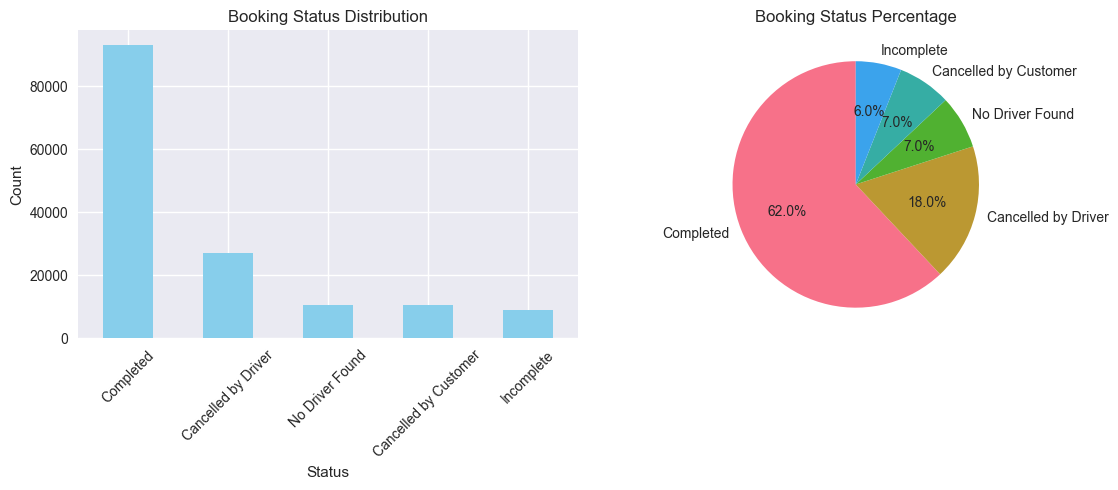

In [6]:
# Analyze booking status distribution
print("Booking Status Distribution:")
print("="*50)
status_counts = df[STATUS_COL].value_counts()
print(status_counts)
print(f"\nPercentage distribution:")
print(status_counts / len(df) * 100)

# Visualize booking status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
status_counts.plot(kind='bar', color='skyblue')
plt.title('Booking Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Booking Status Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()


Vehicle Type Distribution:
Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64


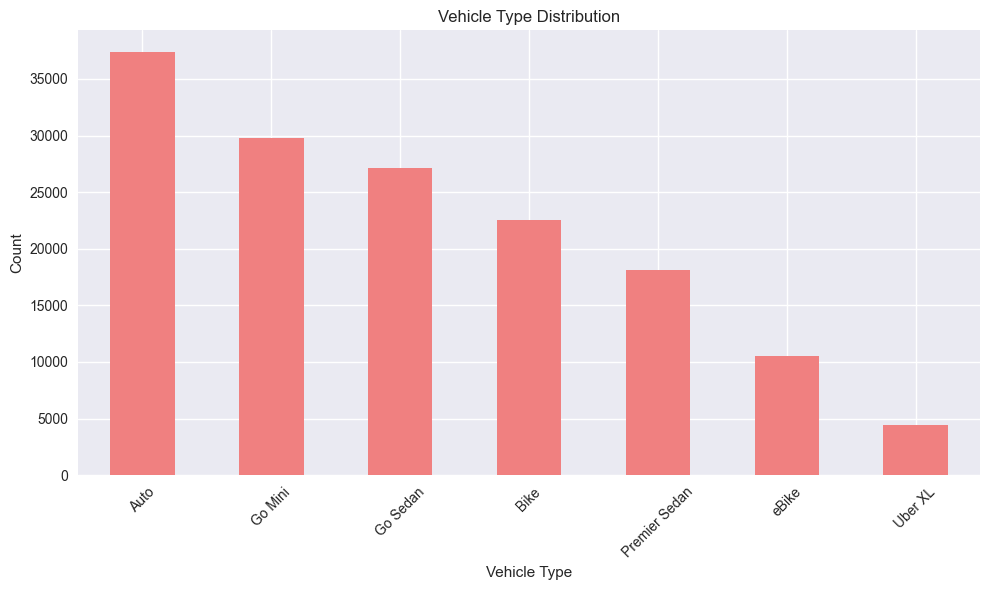

In [7]:
# Analyze vehicle types
print("Vehicle Type Distribution:")
print("="*50)
vehicle_counts = df[VEHICLE_COL].value_counts()
print(vehicle_counts)

plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind='bar', color='lightcoral')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Analyze completed rides only for fare and distance analysis
completed_rides = df[df[STATUS_COL] == 'Completed'].copy()

print("Completed Rides Analysis:")
print("="*50)
print(f"Total completed rides: {len(completed_rides)}")
print(f"Percentage of total rides: {len(completed_rides)/len(df)*100:.1f}%")

# Convert fare and distance to numeric
completed_rides[FARE_COL] = pd.to_numeric(completed_rides[FARE_COL], errors='coerce')
completed_rides[DIST_COL] = pd.to_numeric(completed_rides[DIST_COL], errors='coerce')

# Remove null values for analysis
completed_rides = completed_rides.dropna(subset=[FARE_COL, DIST_COL])

print(f"\nAfter removing nulls: {len(completed_rides)} completed rides")

# Basic statistics for fare and distance
print(f"\nFare Statistics:")
print(f"Mean: ₹{completed_rides[FARE_COL].mean():.2f}")
print(f"Median: ₹{completed_rides[FARE_COL].median():.2f}")
print(f"Min: ₹{completed_rides[FARE_COL].min():.2f}")
print(f"Max: ₹{completed_rides[FARE_COL].max():.2f}")

print(f"\nDistance Statistics:")
print(f"Mean: {completed_rides[DIST_COL].mean():.2f} km")
print(f"Median: {completed_rides[DIST_COL].median():.2f} km")
print(f"Min: {completed_rides[DIST_COL].min():.2f} km")
print(f"Max: {completed_rides[DIST_COL].max():.2f} km")


Completed Rides Analysis:
Total completed rides: 93000
Percentage of total rides: 62.0%

After removing nulls: 93000 completed rides

Fare Statistics:
Mean: ₹508.18
Median: ₹414.00
Min: ₹50.00
Max: ₹4277.00

Distance Statistics:
Mean: 26.00 km
Median: 26.02 km
Min: 2.00 km
Max: 50.00 km


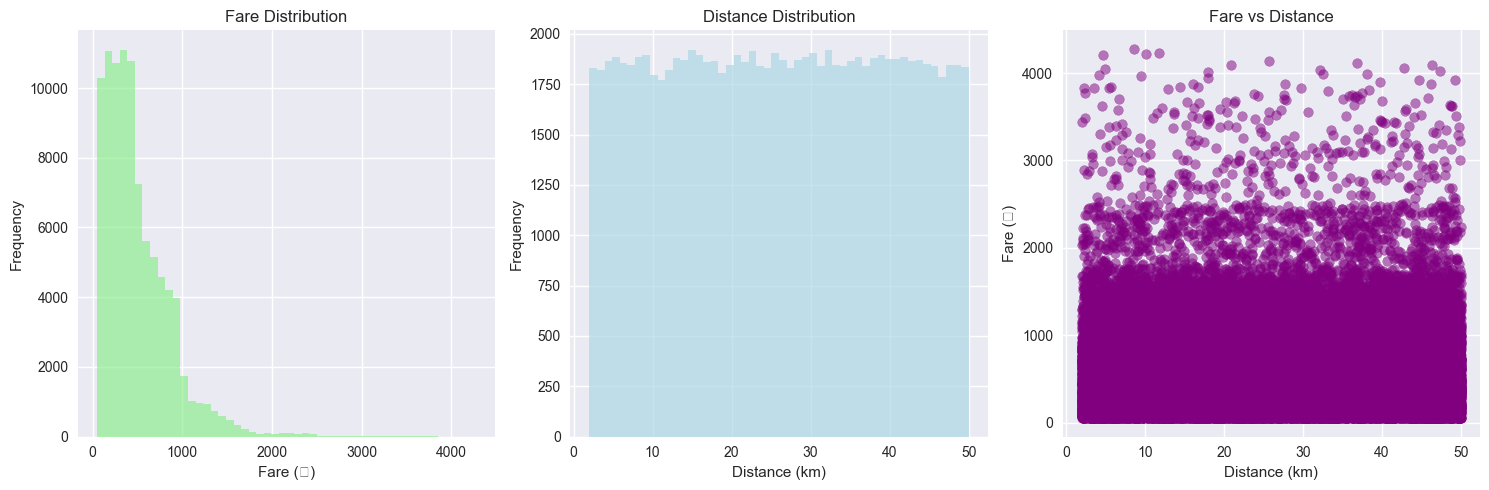

In [9]:
# Visualize fare and distance distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(completed_rides[FARE_COL], bins=50, color='lightgreen', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare (₹)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(completed_rides[DIST_COL], bins=50, color='lightblue', alpha=0.7)
plt.title('Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(completed_rides[DIST_COL], completed_rides[FARE_COL], alpha=0.5, color='purple')
plt.title('Fare vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare (₹)')

plt.tight_layout()
plt.show()


Customer Behavior Analysis:
Rides per customer statistics:
Mean: 1.01
Median: 1.00
Max: 3


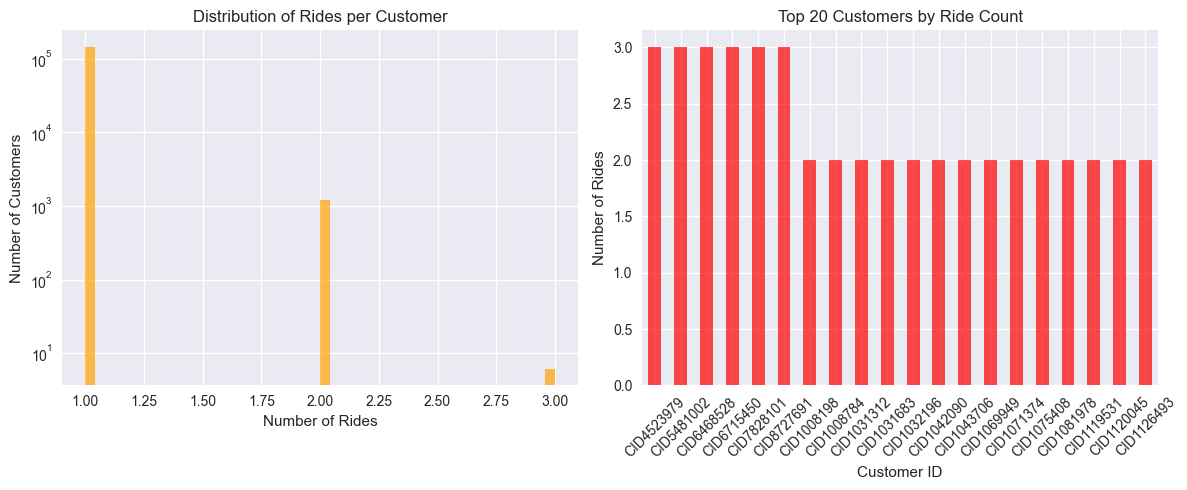

In [10]:
# Analyze customer behavior patterns
print("Customer Behavior Analysis:")
print("="*50)

# Rides per customer
rides_per_customer = df.groupby(USER_COL).size()
print(f"Rides per customer statistics:")
print(f"Mean: {rides_per_customer.mean():.2f}")
print(f"Median: {rides_per_customer.median():.2f}")
print(f"Max: {rides_per_customer.max()}")

# Customer distribution by number of rides
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
rides_per_customer.hist(bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Rides per Customer')
plt.xlabel('Number of Rides')
plt.ylabel('Number of Customers')
plt.yscale('log')  # Log scale due to long tail

plt.subplot(1, 2, 2)
# Top 20 customers by ride count
top_customers = rides_per_customer.nlargest(20)
top_customers.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 20 Customers by Ride Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Time-based Analysis:


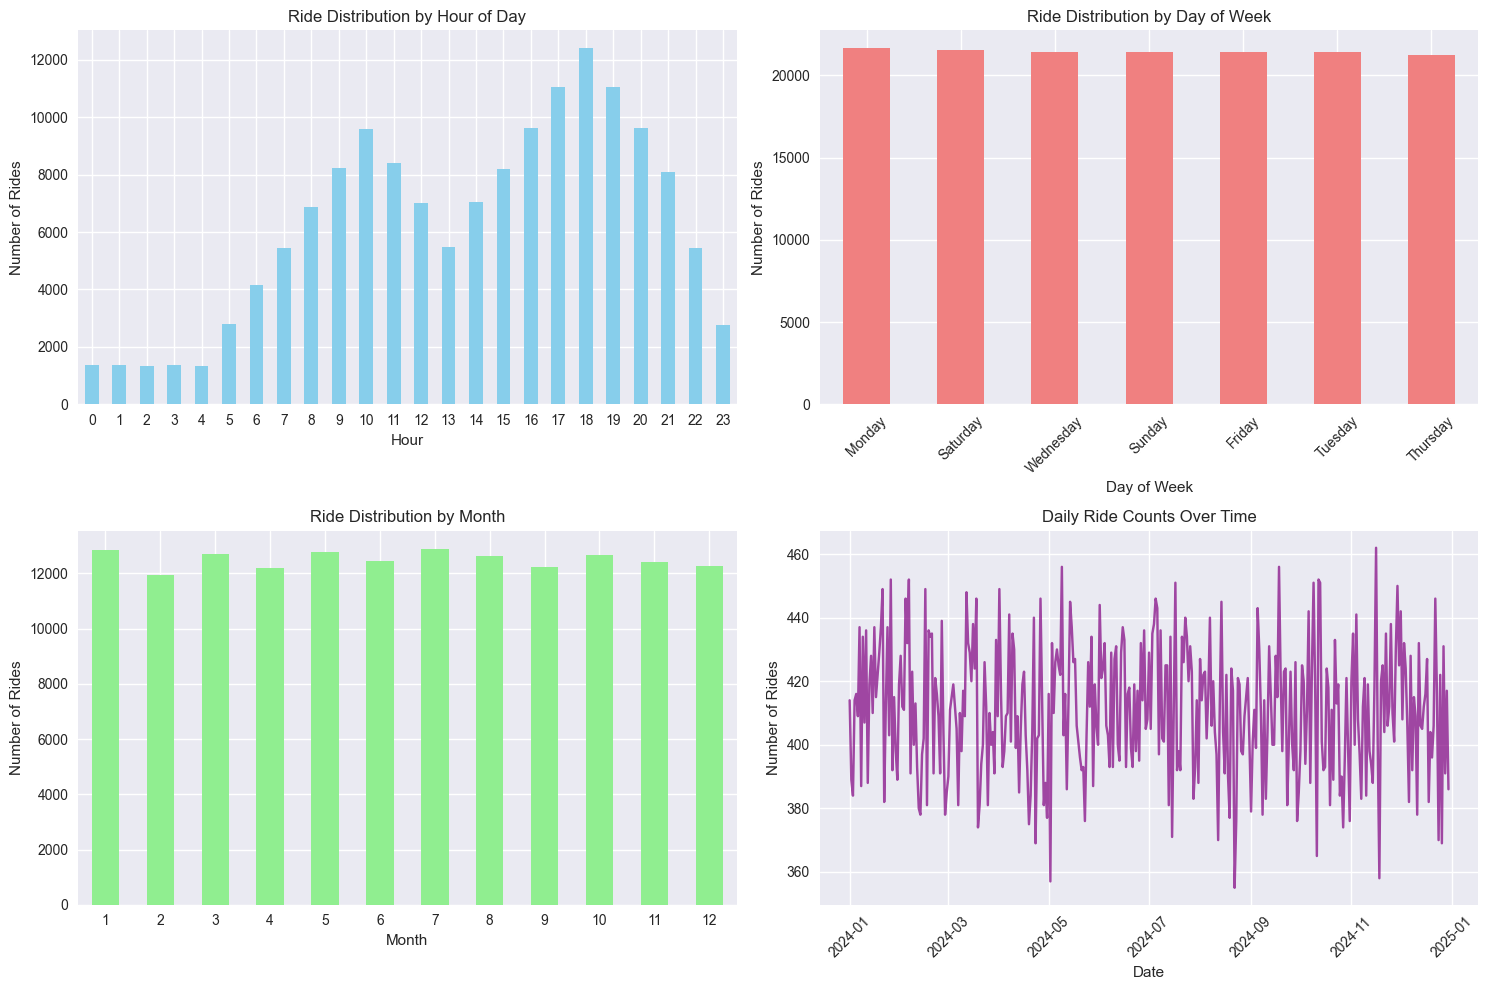

In [11]:
# Time-based analysis
print("Time-based Analysis:")
print("="*50)

# Extract time components
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month
df['date'] = df['datetime'].dt.date

# Hourly distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Ride Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

plt.subplot(2, 2, 2)
daily_counts = df['day_of_week'].value_counts()
daily_counts.plot(kind='bar', color='lightcoral')
plt.title('Ride Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', color='lightgreen')
plt.title('Ride Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
# Daily ride counts over time
daily_rides = df.groupby('date').size()
daily_rides.plot(color='purple', alpha=0.7)
plt.title('Daily Ride Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Rating Analysis:
Driver ratings - Non-null values: 93000
Driver rating statistics:
Mean: 4.23
Median: 4.30
Customer ratings - Non-null values: 93000
Customer rating statistics:
Mean: 4.40
Median: 4.50

Payment Method Distribution:
Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64


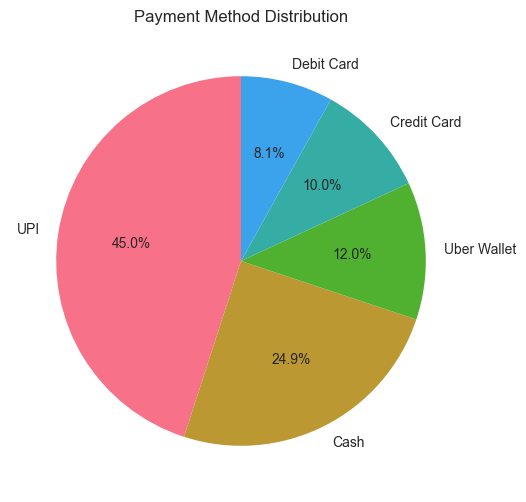

In [12]:
# Analyze ratings (if available)
print("Rating Analysis:")
print("="*50)

# Check if rating columns exist and have data
if DRIVER_RATING_COL in df.columns:
    driver_ratings = pd.to_numeric(df[DRIVER_RATING_COL], errors='coerce')
    print(f"Driver ratings - Non-null values: {driver_ratings.notna().sum()}")
    if driver_ratings.notna().sum() > 0:
        print(f"Driver rating statistics:")
        print(f"Mean: {driver_ratings.mean():.2f}")
        print(f"Median: {driver_ratings.median():.2f}")

if CUSTOMER_RATING_COL in df.columns:
    customer_ratings = pd.to_numeric(df[CUSTOMER_RATING_COL], errors='coerce')
    print(f"Customer ratings - Non-null values: {customer_ratings.notna().sum()}")
    if customer_ratings.notna().sum() > 0:
        print(f"Customer rating statistics:")
        print(f"Mean: {customer_ratings.mean():.2f}")
        print(f"Median: {customer_ratings.median():.2f}")

# Payment method analysis
if PAYMENT_COL in df.columns:
    print(f"\nPayment Method Distribution:")
    payment_counts = df[PAYMENT_COL].value_counts()
    print(payment_counts)
    
    plt.figure(figsize=(8, 6))
    payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Payment Method Distribution')
    plt.ylabel('')
    plt.show()


In [13]:
# Summary and key insights for churn prediction
print("EDA Summary for Churn Prediction:")
print("="*50)

print("Key Insights:")
print("1. Dataset contains", len(df), "total bookings from", df[USER_COL].nunique(), "unique customers")
print("2. Date range:", df['datetime'].min().strftime('%Y-%m-%d'), "to", df['datetime'].max().strftime('%Y-%m-%d'))
print("3. Completion rate:", f"{len(completed_rides)/len(df)*100:.1f}%")
print("4. Average rides per customer:", f"{rides_per_customer.mean():.2f}")
print("5. Peak hours:", hourly_counts.nlargest(3).index.tolist())
print("6. Most popular vehicle type:", vehicle_counts.index[0])

print("\nFeatures available for churn modeling:")
print("- Customer ID (for grouping)")
print("- Date/Time (for recency and frequency features)")
print("- Booking Status (for completion rates)")
print("- Vehicle Type (for preference patterns)")
print("- Fare/Distance (for monetary value)")
print("- Ratings (for satisfaction indicators)")
print("- Payment Method (for behavior patterns)")

print("\nNext steps:")
print("1. Define churn as customers with no rides in last 30 days")
print("2. Build features from 90-day lookback window")
print("3. Create time-based, frequency, and monetary features")
print("4. Train classification models with SHAP explainability")


EDA Summary for Churn Prediction:
Key Insights:
1. Dataset contains 150000 total bookings from 148788 unique customers
2. Date range: 2024-01-01 to 2024-12-30
3. Completion rate: 62.0%
4. Average rides per customer: 1.01
5. Peak hours: [18, 19, 17]
6. Most popular vehicle type: Auto

Features available for churn modeling:
- Customer ID (for grouping)
- Date/Time (for recency and frequency features)
- Booking Status (for completion rates)
- Vehicle Type (for preference patterns)
- Fare/Distance (for monetary value)
- Ratings (for satisfaction indicators)
- Payment Method (for behavior patterns)

Next steps:
1. Define churn as customers with no rides in last 30 days
2. Build features from 90-day lookback window
3. Create time-based, frequency, and monetary features
4. Train classification models with SHAP explainability
